In [1]:
import torch
from dpm.models import LinearDiscriminantAnalysis
from dpm.distributions import Normal
from dpm.visualize import plot_stats, plot_models, plot_model, plot_hist

In [2]:
y = torch.cat((torch.zeros(1000), torch.ones(2000))).view(-1, 1)
y.shape

torch.Size([3000, 1])

In [3]:
x_model_0 = Normal(torch.zeros(10)+4., torch.eye(10)*2 + 4)
x_model_1 = Normal(torch.zeros(10)-2, torch.eye(10)*5 - 0.2)
# plot_models(x_model_0, x_model_1)
x = torch.cat((x_model_0.sample(1000).detach(), x_model_1.sample(2000).detach()), dim=0)
x.shape

torch.Size([3000, 10])

In [4]:
model = LinearDiscriminantAnalysis(n_features=10)

In [5]:
model.log_prob(x, y)

tensor([-114.6031,  -38.4226, -185.3933,  ...,  -33.6264,  -37.5984,
         -32.6981], grad_fn=<SumBackward2>)

In [6]:
stats = model.fit(x, y)

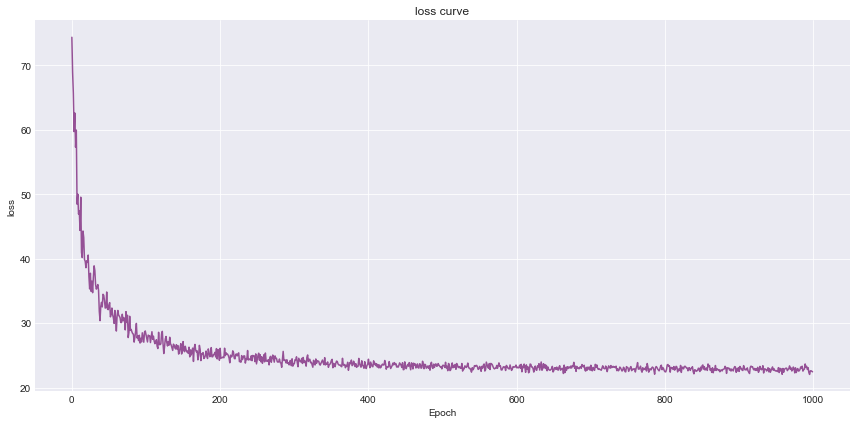

In [7]:
plot_stats(stats)

In [8]:
model.y_dist.probs

tensor([0.3275, 0.6725], grad_fn=<SoftmaxBackward>)

In [9]:
(model.predict(x) == y.long()).float().mean()

tensor(0.9690)

In [10]:
model.x_means

Parameter containing:
tensor([[ 1.6976,  2.1171,  2.2683,  2.0584,  2.3565,  1.9847,  1.9629,  1.8537,
          1.8800,  1.4630],
        [-1.1802, -1.2387, -1.2482, -1.2068, -1.4994, -1.3034, -1.2324, -1.2573,
         -1.3239, -1.1765]], requires_grad=True)

In [11]:
model.covariance

tensor([[7.7234, 3.4322, 3.1377, 3.2460, 3.0809, 3.3000, 3.4580, 3.5767, 3.5835,
         4.0436],
        [3.4322, 7.0383, 2.8244, 3.2114, 2.5778, 3.0752, 3.3198, 3.1757, 3.2508,
         3.6398],
        [3.1377, 2.8244, 6.7706, 2.8847, 2.7738, 2.8551, 2.9017, 3.0528, 2.9545,
         3.1094],
        [3.2460, 3.2114, 2.8847, 7.0495, 2.6323, 3.1644, 3.0546, 3.2026, 3.2762,
         3.6369],
        [3.0809, 2.5778, 2.7738, 2.6323, 6.2389, 2.5701, 2.6813, 2.6573, 2.9446,
         3.0291],
        [3.3000, 3.0752, 2.8551, 3.1644, 2.5701, 7.0043, 3.2554, 3.2773, 3.2302,
         3.6880],
        [3.4580, 3.3198, 2.9017, 3.0546, 2.6813, 3.2554, 7.2921, 3.3668, 3.3133,
         3.7032],
        [3.5767, 3.1757, 3.0528, 3.2026, 2.6573, 3.2773, 3.3668, 7.1363, 3.4757,
         3.6916],
        [3.5835, 3.2508, 2.9545, 3.2762, 2.9446, 3.2302, 3.3133, 3.4757, 7.2622,
         4.0542],
        [4.0436, 3.6398, 3.1094, 3.6369, 3.0291, 3.6880, 3.7032, 3.6916, 4.0542,
         8.1383]], grad_fn=<

In [12]:
X = model.sample(5)
print(X)

tensor([[ 5.5415,  1.3305,  2.3298,  5.1230,  3.3555,  4.2882,  2.6869,  4.4880,
          3.9485,  4.0784],
        [ 1.0894,  1.3316,  0.2331,  2.5924,  0.4165,  2.4107,  1.2045,  1.8199,
          2.4204,  0.9464],
        [-0.7333,  0.9315, -0.8724, -1.6606,  2.4266,  0.0518,  1.7839,  0.3938,
          0.3585,  3.0714],
        [-2.7008, -1.6339,  1.7203, -1.8867, -3.9038, -2.9867, -0.7939, -4.9009,
         -3.4978, -4.2148],
        [-4.8686, -0.6036, -2.9033, -2.7732, -1.7783, -0.0161,  1.3457, -1.9886,
         -4.1820,  0.1143]], grad_fn=<IndexBackward>)


In [13]:
model.predict(X)

tensor([[0],
        [0],
        [1],
        [1],
        [1]])

In [15]:
x_s, y_s = model.sample(5, return_y=True)
x_s.shape, y_s.shape

(torch.Size([5, 10]), torch.Size([5, 1]))

In [16]:
# plot_hist(model.sample(5000).detach())

In [17]:
(model.predict(x_s) == y_s).float().mean()

tensor(0.8000)